# **Automotive Fuel Economy**

## Recommended Analysis

#### Q1) What is the overall trend in fuel economy over time?

#### Q2) Which automobile characteristic is most correlated to fuel economy?

#### Q3) Is there a difference in fuel economy by the origin of the car produced? If so, is there an underlying difference in the types of cars manufactured in each?

In [1]:
# Importing necessary Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Processing

In [2]:
df = pd.read_csv("auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [16]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum().sum()

np.int64(0)

#### We will replace any garbage value i.e. '?' in dataset with np.nan()

In [7]:
for col in df.columns:
    unique = df[col].unique()

In [8]:
df.replace('?', np.nan, inplace=True)

#### The column **car name** is not required and can effect our result. So we wil drop it.

In [9]:
df.drop(columns = ['car name'], inplace = True)

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### Converting "horsepower" columns to correct datatype.

In [23]:
df['horsepower'] = df['horsepower'].apply(pd.to_numeric, errors = 'coerce')

#### So here we are now done with Data Cleaning. Let's proceed to finging the insights to our questions.

## Q1) What is the overall trend in fuel economy over time?

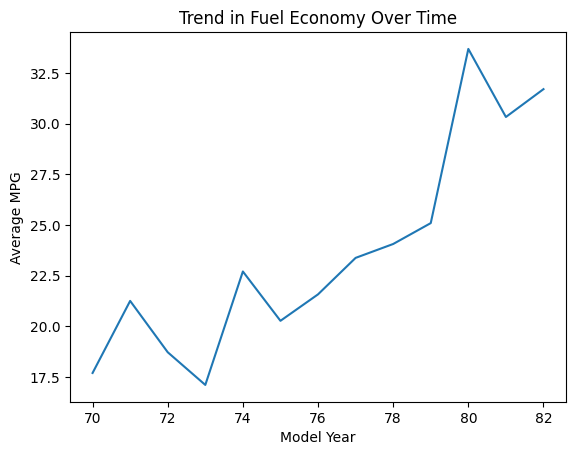

In [10]:
df.groupby("model year")["mpg"].mean().plot(kind="line")  
plt.xlabel("Model Year")  
plt.ylabel("Average MPG")  
plt.title("Trend in Fuel Economy Over Time")  
plt.show()

## Q2) Which automobile characteristic is most correlated to fuel economy?

In [11]:
correlation_matrix = df.corr()
print(correlation_matrix["mpg"].sort_values(ascending=False))


mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


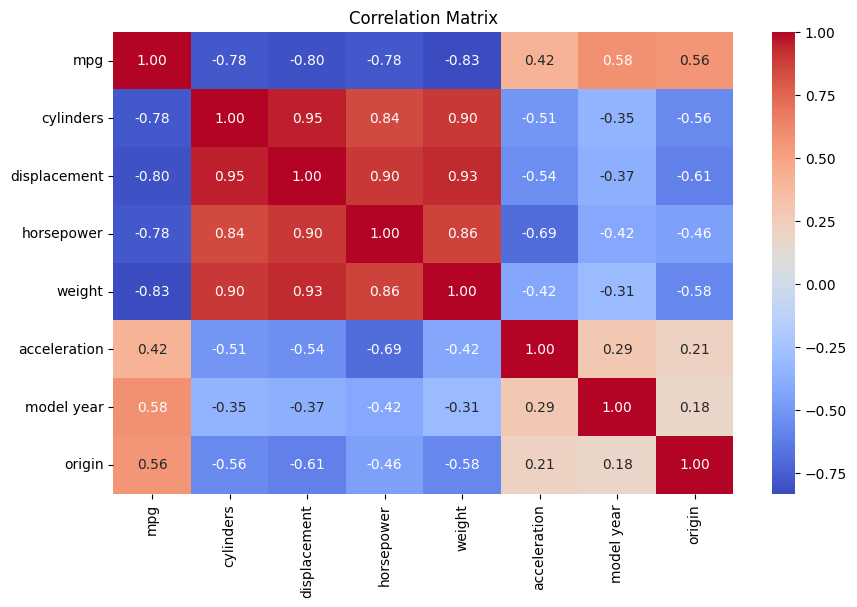

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

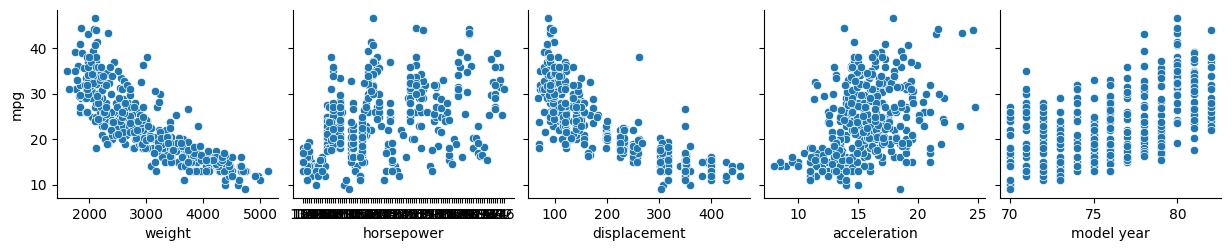

In [15]:
sns.pairplot(df, x_vars=['weight', 'horsepower', 'displacement', 'acceleration', 'model year'], y_vars=['mpg'], kind='scatter')
plt.show()

## Q3) Is there a difference in fuel economy by the origin of the car produced? If so, is there an underlying difference in the types of cars manufactured in each?

In [17]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


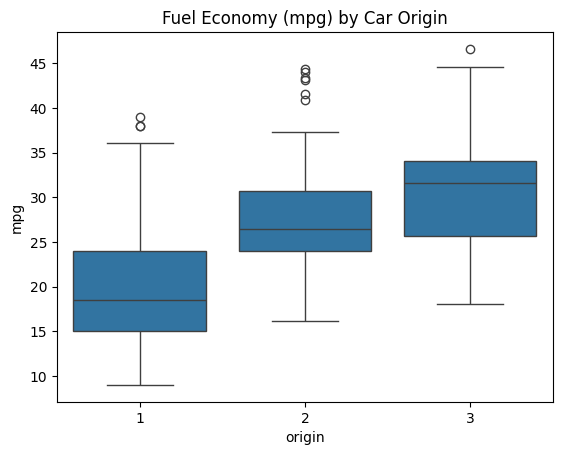

In [18]:
sns.boxplot(x="origin", y="mpg", data=df)
plt.title("Fuel Economy (mpg) by Car Origin")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


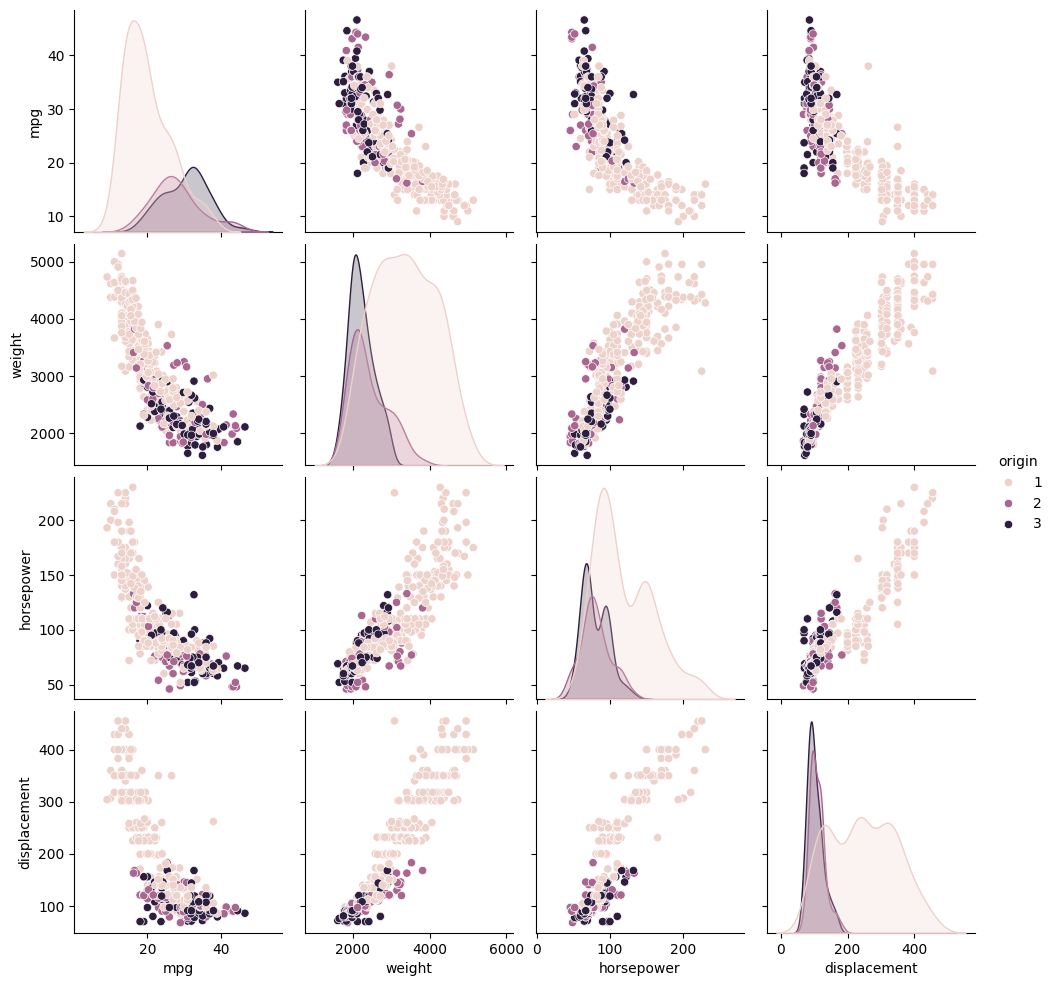

In [24]:
df.groupby("origin")[["weight", "horsepower", "displacement", "acceleration"]].mean()
sns.pairplot(df, hue="origin", vars=["mpg", "weight", "horsepower", "displacement"])
plt.show()

# Conclusion

## Q1) What is the overall trend in fuel economy over time?
### **Key Insights:**

#### - Fuel economy fluctuated significantly. It wasn't a steady improvement.
#### - A dip in the early 1970s likely reflects the impact of the 1973 oil crisis.
#### - A significant rise in the late 1970s likely indicates advancements in engine technology and government regulations.
#### - Overall, fuel economy improved from 1970 to 1982, despite the fluctuations.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q2) Which automobile characteristic is most correlated to fuel economy?
### **Key Insights:**

#### - **Weight** is most **negatively** correlated to 'mpg'. Higher the weight, lower the mpg.
#### - **Model Year** is most **positively** correlated to 'mpg'. Latest models have higher mpg.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q3) Is there a difference in fuel economy by the origin of the car produced? If so, is there an underlying difference in the types of cars manufactured in each?
### **Key Insights:**

#### Yes, there is a difference in fuel economy by the origin of the car produced. 
#### - Cars of **Origin 1** have lower mpg. 
#### - Cars of **Origin 3** have higher mpg. 
#### - Cars of **origin 2** have mpg lying between those of Origin 1 and Origin 3.
#### Yes, there are underlying differences in the types of cars manufactured in each origin.
#### - Fuel economy (mpg) is inversely related to weight, horsepower, and displacement.
#### - **Origin 3** are generally more fuel-efficient.
#### - **Origin 1** tend to be heavier, have larger engines, and consume more fuel.
#### - **Origin 2** fall in between.